In [1]:
# import data from csv file 
import numpy as np
import pandas as pd

# scrubbing 
from nilearn.interfaces.fmriprep import load_confounds 

# Smoothing 
from nilearn import image 

# Seed to voxel correlations 
from nilearn.maskers import NiftiSpheresMasker
from nilearn.maskers import NiftiMasker
import matplotlib.pyplot as plt
import numpy as np
from nilearn.plotting import plot_connectome
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting


In [2]:

# for index,row in data.iterrows():

fmri_file = f'/Users/Utilisateur/Documents/rfMRI_REST1_LR.nii.gz'
confound_file = f'/Users/Utilisateur/Documents/Movement_Regressors_dt_REST1_LR.txt' 
    
    # print(f'/data/HCP/{row["id"]}/image.nii.gz')



# confounds : mouvement regressors_dt 

### Coordinates 

In [4]:
opIFG_coords = [(-50, 8, 23)]
planumtemp_coords = [(-51, -42, 21)]
aMTG_coords = [(-60, -6 ,-18)]
pITG_coords = [(-54, -52, -10)]

# coords = [(-50, 8, 23), (-51, -42, 21), (-60, -6 ,-18), (-54, -52, -10)]

### Scrubbing (ne fonctionne pas encore)

With a scrubbing-based strategy, load_confounds returns a sample_mask that removes the index of volumes exceeding the framewise displacement and standardised DVARS threshold, and all the continuous segment with less than five volumes. Before applying scrubbing, it’s important to access the percentage of volumns scrubbed. Scrubbing is not a suitable strategy for datasets with too many high motion subjects.

In [2]:
#from nilearn.interfaces.fmriprep import load_confounds_strategy

#def scrubbing_function (confound_file):
    
    #confound_scrub, sample_mask = load_confounds_strategy (denoise_strategy = "scrubbing")
    
                    




#confounds_scrub,sample_mask = load_confounds(
   # confound_file,
   # strategy=["high_pass", "motion", "wm_csf", "scrub"],
   # motion="basic", wm_csf="basic",
   # scrub=5, fd_threshold=0.2, std_dvars_threshold=3)

#print("After scrubbing, {} out of {} volumes remains".format(
   # sample_mask.shape[0], confounds_scrub.shape[0]))

#print(confounds_scrub.columns)

### Smoothing 

In [16]:
def smoothing_function(img, fwhm ):
    
    smooth_anat_img = image.smooth_img(img, fwhm=fwhm)

    return smooth_anat_img

### Seed to voxel correlation function 

In [17]:
def S2V_function(seed, radius=8, file):
    
    seed_masker = NiftiSpheresMasker(seed, radius=radius, detrend=True, standardize=True,low_pass=0.1, high_pass=0.01, t_r=2,
                                    memory='nilearn_cache', memory_level=1, verbose=0)
    
    
    seed_time_series = seed_masker.fit_transform(fmri_file,
                                  confounds=[confound_file])
    
    brain_masker = NiftiMasker(smoothing_fwhm=6, detrend=True, standardize=True, low_pass=0.1, high_pass=0.01, t_r=2,
                                   memory='nilearn_cache', memory_level=1, verbose=0)
    
    brain_time_series = brain_masker.fit_transform(fmri_file,
                                               confounds=[confound_file])
    
    print("Seed time series shape: (%s, %s)" % seed_time_series.shape)
    print("Brain time series shape: (%s, %s)" % brain_time_series.shape)
    
    plt.plot(seed_time_series)
    plt.title('Seeds time series')
    plt.xlabel('Scan number')
    plt.ylabel('Normalized signal')
    #plt.tight_layout()
    
    seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0])
    
    seed_to_voxel_correlations_img = brain_masker.inverse_transform(seed_to_voxel_correlations.T)
    
    print("Seed-to-voxel correlation shape: (%s, %s)" %
          seed_to_voxel_correlations.shape)
    print("Seed-to-voxel correlation: min = %.3f; max = %.3f" % (
        seed_to_voxel_correlations.min(), seed_to_voxel_correlations.max()))

    display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.5, vmax=1,
                                 cut_coords=seed[0],
                                 title="Seed-to-voxel correlation",
                                 )
    display.add_markers(marker_coords=seed, marker_color='g',
                        marker_size=50)
    
    plotting.plot_glass_brain(seed_to_voxel_correlations_img, threshold=0.5, colorbar=True, 
                                plot_abs=False,display_mode='lyrz')
    
   

Seed time series shape: (1200, 1)
Brain time series shape: (1200, 229404)
Seed-to-voxel correlation shape: (229404, 1)
Seed-to-voxel correlation: min = -0.268; max = 0.825


C:\Users\Utilisateur\AppData\Roaming\Python\Python39\site-packages\nilearn\plotting\img_plotting.py:348: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


Seed time series shape: (1200, 1)
Brain time series shape: (1200, 229404)


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9212\4258607719.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Seed-to-voxel correlation shape: (229404, 1)
Seed-to-voxel correlation: min = -0.281; max = 0.871
Seed time series shape: (1200, 1)
Brain time series shape: (1200, 229404)


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9212\4258607719.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Seed-to-voxel correlation shape: (229404, 1)
Seed-to-voxel correlation: min = -0.301; max = 0.787
Seed time series shape: (1200, 1)
Brain time series shape: (1200, 229404)


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_9212\4258607719.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Seed-to-voxel correlation shape: (229404, 1)
Seed-to-voxel correlation: min = -0.218; max = 0.782


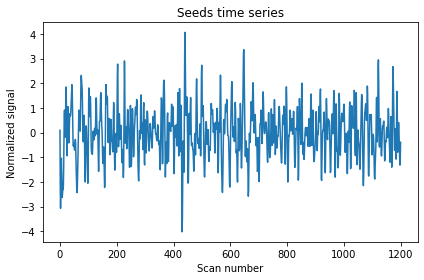

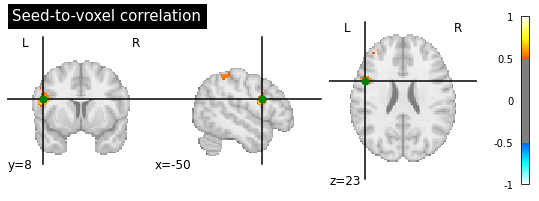

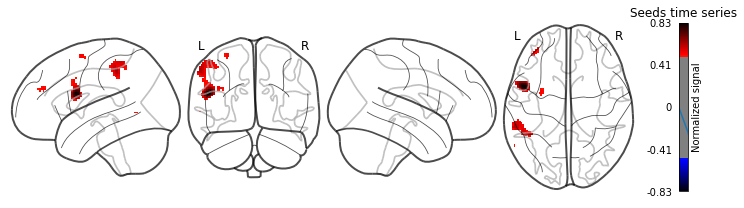

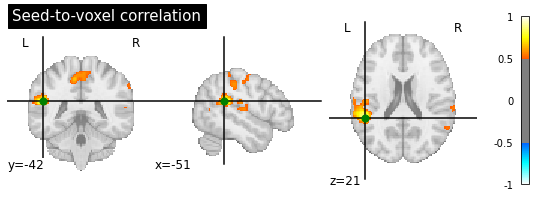

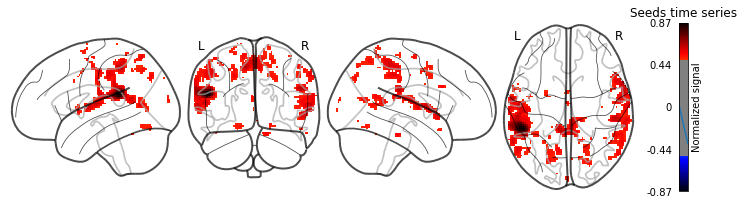

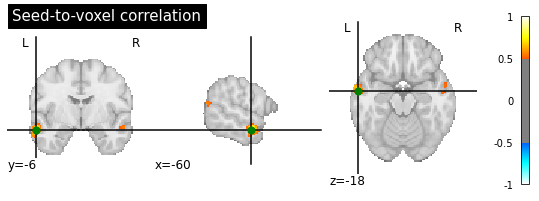

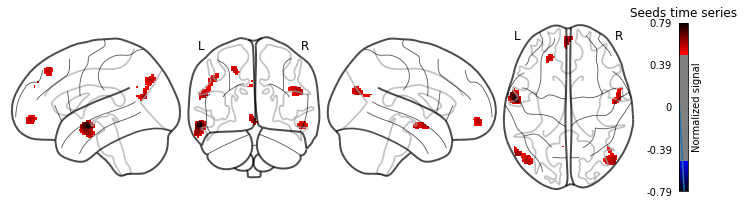

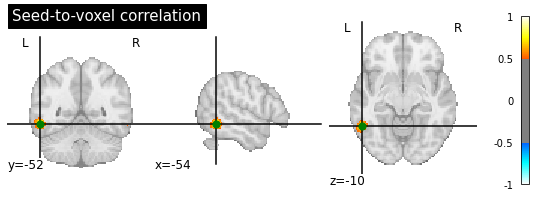

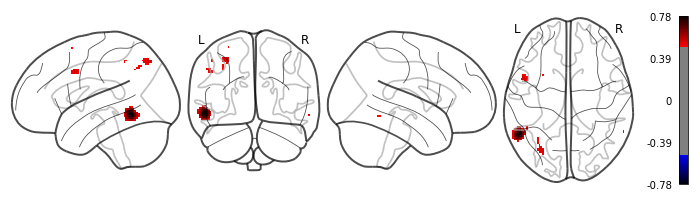

In [18]:
fmri_file=
S2V_function(opIFG_coords)
fmri_file=
S2V_function(planumtemp_coords) 
S2V_function(aMTG_coords)
S2V_function(pITG_coords)
